Visualization of corVsCor


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/home/ndh0004/Documents/corKsKa/CorVsCorTotalNGML.tsv',
                 sep='\t'
                )

In [3]:
df.describe()


,MLds,MLdn,NGds,NGdn
count,31919.000000,31919.000000,31919.000000,31919.000000
mean,1.186389,0.143213,0.495449,0.148818
std,6.455522,0.195886,0.686858,0.204670
min,0.000000,0.000000,0.000000,0.000000
25%,0.058900,0.013900,0.065900,0.013700
50%,0.124800,0.041300,0.130600,0.041700
75%,0.747500,0.216750,0.741600,0.225550
max,70.627300,1.381900,6.410500,1.427400


In [4]:
df.columns

Index(['MLds', 'MLdn', 'NGds', 'NGdn', 'call0', 'scafType0', 'SitaProt0',
       'SitaKegg0', 'KeggOrth0', 'seq0', 'call1', 'scafType1', 'SitaProt1',
       'SitaKegg1', 'KeggOrth1', 'seq1', 'id'],
      dtype='object')

In [5]:
df.hist(column='MLds',bins=600)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f83daed30>]],
      dtype=object)

In [6]:
import numpy as np 
df['logged'] = np.log10(df['MLds'] + 1e-4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f816b7dd8>]],
      dtype=object)

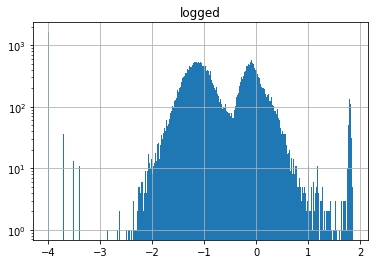

In [7]:

df.hist(column='logged',bins=300,log=True)

In [8]:
def callTot(c):
    """
    
    :param c: dataframe
    :return: a call for each of the columns
    """
    toRet = 'na'
    if c['call0'] == 'a' and c['call1'] == 'a':
        toRet = 'aa'
    elif  c['call0'] == 'b' and c['call1'] == 'b':
        toRet = 'bb'
    elif ( c['call0'] == 'a' and c['call1'] == 'b' ) or \
        ( c['call0'] == 'b' and c['call1'] == 'a' ) :
        toRet = 'ab'
    return toRet

In [9]:
df['call0'][0:20]

0      b
1     na
2     na
3      b
4     na
5     na
6     na
7      a
8     na
9     na
10     a
11    na
12     a
13    na
14    na
15     b
16     a
17     a
18    na
19     a
Name: call0, dtype: object

In [10]:
df['called'] = df.apply(callTot, axis=1)

In [11]:

df['called'].value_counts()

In [12]:
op = '/home/ndh0004/code/coge_tools/custom_scripts/ref_data/photoSynthesis.list'
f = open(op)
oxphos = f.read().rstrip('\n').split('\n')
f.close()

def callPathWay(c):

    
    toRet = 'genbkdg'
    if c['KeggOrth0']  in oxphos \
        or c['KeggOrth1'] in oxphos :
        toRet = 'oxphos'
    elif  c['KeggOrth0'] not in ['None','na'] and \
         c['KeggOrth1'] not in ['None','na']:
        toRet = 'keggbkgd'
        
    return toRet


In [13]:
df['pthway'] = df.apply(callPathWay, axis=1)

In [14]:

def createPathwayGroup(c):
    toRet = '{p}_{c}'.format(
        p=c['pthway'],
        c=c['called']
    )
    return toRet

In [15]:
df['group'] = df.apply(createPathwayGroup, axis=1)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
groups = df.group.unique()

In [18]:
groups


In [19]:
subset = ['keggbkgd_ab','keggbkgd_aa', 'keggbkgd_bb',
          'oxphos_ab', 'oxphos_aa', 'oxphos_na', 'oxphos_bb']

In [20]:
df['logMLds'] = np.log10(df['MLds'] + 1e-4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f814a15c0>,
      dtype=object)

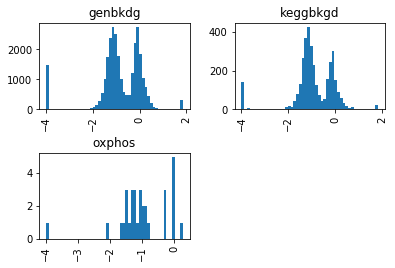

In [21]:
df.hist(column='logMLds',
        by='pthway',
        bins=50)

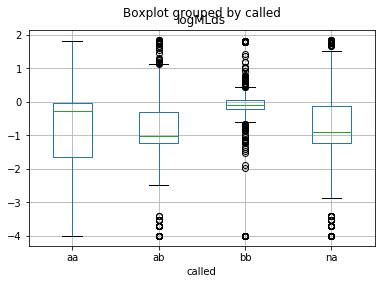

In [22]:
boxplot = df.boxplot(column='logMLds',
                     by='called')


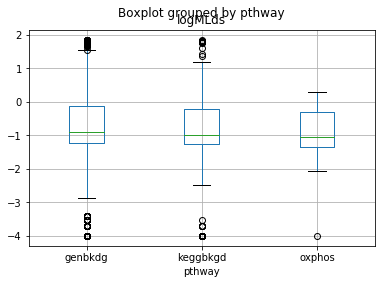

In [23]:
boxplot = df.boxplot(column='logMLds',
                     by='pthway')

In [24]:
import seaborn as sns
len(subset)

7

ab blue
aa violet


bb green


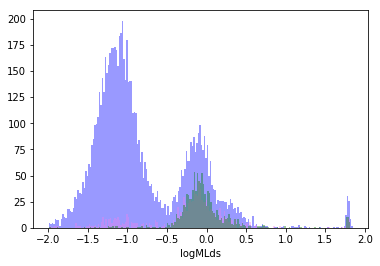

In [25]:
for x,col in zip( ['ab','aa','bb']  ,['blue','violet','green'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-2) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False, kde=False)


In [26]:
oro = pd.read_csv('/home/ndh0004/Documents/corKsKa/clean_CorVsOroCall.tsv',
                 sep=' ',
 #                 low_memory=False
                )

In [27]:
oro['nMLds'] = pd.to_numeric(oro['MLds'])


In [28]:
np.log10(0.1 + 1e-4)

-0.9995659225206813

In [29]:
oro['logged'] = np.log10(oro['MLds']+ 1e-4)

ab blue


aa violet


bb green


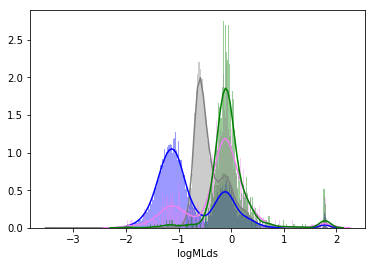

In [30]:
sns.distplot(oro['logged'],color='gray',bins=200,rug=False, kde=True)
for x,col in zip( ['ab','aa','bb']  ,['blue','violet','green'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-2) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False, kde=True)

In [31]:
ind = pd.read_csv( "/home/ndh0004/Documents/corKsKa/Ind30KVsCorTotalNGMLv2.clean", sep=" ")
ind['logged'] = np.log10(ind['MLds'] + 1e-4)



In [32]:
indClean = ind.loc[ind.logged > -4]

In [33]:
print(len(indClean['logged']))
print(len(oro['logged']))

29378
46163


ab blue


aa violet
bb green


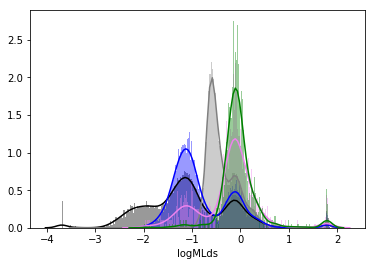

In [115]:
sns.distplot(indClean['logged'],color='black',bins=200,rug=False,kde=True)
sns.distplot(oro['logged'],color='gray',bins=200,rug=False, kde=True)
for x,col in zip( ['ab','aa','bb']  ,['blue','violet','green'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-2) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False, kde=True)

a black
b darkblue


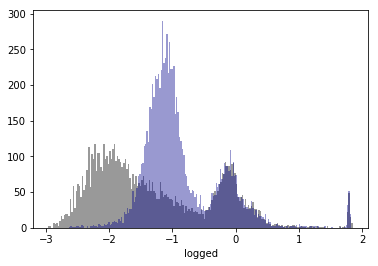

In [123]:
for x, col in zip(['a','b'],['black','darkblue'] ):
    ssdf = indClean.loc[(indClean.call0 == x) & (indClean.logged > -3) ]
    print(x,col)
    if len(ssdf['logged']) >1 :\
         sns.distplot(ssdf['logged'],color=col,bins=200,rug=False, kde=False)

a black


b darkblue


aa violet


bb green


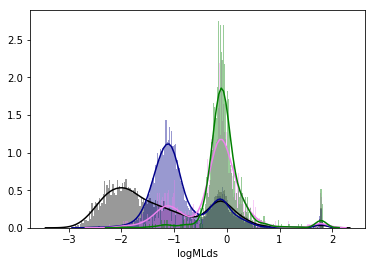

In [130]:
for x, col in zip(['a','b'],['black','darkblue'] ):
    ssdf = indClean.loc[(indClean.call0 == x) & (indClean.logged > -3) ]
    print(x,col)
    if len(ssdf['logged']) >1 :\
         sns.distplot(ssdf['logged'],color=col,bins=200,rug=False, kde=True)
for x,col in zip( ['aa','bb']  ,['violet','green'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-3) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False, kde=True)


a black


b darkblue


aa violet


bb green
ab skyblue


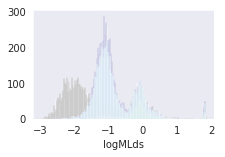

In [36]:
sns.set_style("dark")
plt.figure(figsize=(3.25 ,2.0))
for x, col in zip(['a','b'],['black','darkblue'] ):
    ssdf = indClean.loc[(indClean.call0 == x) & (indClean.logged > -3) ]
    print(x,col)
    if len(ssdf['logged']) >1 :\
         sns.distplot(ssdf['logged'],color=col,bins=200,rug=False, kde=False)
for x,col in zip( ['aa','bb','ab']  ,['violet','green','skyblue'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-3) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False, kde=False)
plt.savefig("/home/ndh0004/Documents/corKsKa/ksKa_abiv3.svg", format="svg")

a black
b darkblue


aa violet
bb red
ab skyblue


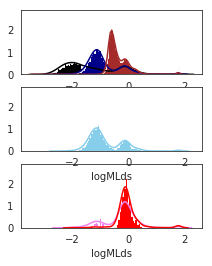

In [62]:
sns.set_style("white")
plt.figure(figsize=(3.25 ,4.0))

ax1 = plt.subplot(311)
for x, col in zip(['a','b'],['black','darkblue'] ):
    ssdf = indClean.loc[(indClean.call0 == x) & (indClean.logged > -3) ]
    print(x,col)
    if len(ssdf['logged']) >1 :\
         sns.distplot(ssdf['logged'],color=col,bins=200,rug=False, kde=True,
                                             hist_kws={"histtype":'stepfilled' , "linewidth": 1,
                             "alpha": 1.0, "color": col})
sns.distplot(oro['logged'],color='brown',bins=200,rug=False, kde=True                      , hist_kws={"histtype":'stepfilled' , "linewidth": 1,
                             "alpha": 1.0, "color": 'brown'})


plt.subplot(313,sharex=ax1, sharey=ax1)

"""
for x, col in zip(['a','b'],['black','darkblue'] ):
    ssdf = indClean.loc[(indClean.call0 == x) & (indClean.logged > -3) ]
    print(x,col)
    if len(ssdf['logged']) >1 :\
         sns.distplot(ssdf['logged'],color=col,bins=200,rug=False
                      , kde=True
                      , hist_kws={"histtype":'stepfilled' , "linewidth": 1,
                             "alpha": 1.0, "color": col}
                      )
"""
for x,col in zip( ['aa','bb']  ,['violet','red'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-3) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False
                     , kde=True
                     ,hist_kws={"histtype":'stepfilled' , "linewidth": 1,
                             "alpha": 1.0, "color": col}
                     )
plt.subplot(312,sharex=ax1, sharey=ax1)

for x,col in zip( ['ab']  ,['skyblue'] ):
    ssdf = df.loc[(df.called == x) & ( df.logMLds >-3) ]
    print(x,col)
    if len(ssdf['logMLds']) >1 :
        sns.distplot(ssdf['logMLds'],color=col,bins=200,rug=False
                     , kde=True
                     ,hist_kws={"histtype":'stepfilled' , "linewidth": 1,
                             "alpha": 1.0, "color": col}
                     )


plt.savefig("/home/ndh0004/Documents/corKsKa/ksKa_ciov1.svg", format="svg")